In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-twitch-streamers-data-may-2024/datasetV2.csv


In [4]:
df = pd.read_csv('/kaggle/input/top-1000-twitch-streamers-data-may-2024/datasetV2.csv')

In [8]:
print(df.head())

   RANK      NAME LANGUAGE         TYPE              MOST_STREAMED_GAME  \
0     1  kaicenat  English  personality                   Just Chatting   
1     2    jynxzi  English  personality  Tom Clancy's Rainbow Six Siege   
2     3   caedrel  English  personality               League of Legends   
3     4   caseoh_  English  personality                        NBA 2K23   
4     5      ibai  Spanish  personality                   Just Chatting   

  2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
0      I'm Only Sleeping                      7.6   
1               NBA 2K20                      5.4   
2      I'm Only Sleeping                      6.3   
3          Just Chatting                      4.6   
4      League of Legends                      4.1   

   FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  \
0                        18405                   15852                   2.3   
1                         3386                    1145                

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    int64  
 8   AVG_VIEWERS_PER_STREAM          999 non-null    int64  
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    int64  
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOT

In [11]:
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
              RANK  AVERAGE_STREAM_DURATION  FOLLOWERS_GAINED_PER_STREAM  \
count   999.000000               999.000000                   999.000000   
mean    500.972973                 5.996697                  3383.445445   
std     288.576373                 3.241013                  2742.696216   
min       1.000000                 1.200000                 -4240.000000   
25%     251.500000                 4.200000                  1360.500000   
50%     501.000000                 5.400000                  2450.000000   
75%     750.500000                 6.900000                  4831.500000   
max    1000.000000                23.900000                 18889.000000   

       AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  \
count              999.000000            999.000000           999.000000   
mean             19595.082082              1.477878          6504.741742   
std              43241.584073              0.575189        

In [12]:
print("\nDistribución de idiomas:")
language_distribution = df['LANGUAGE'].value_counts()
print(language_distribution)


Distribución de idiomas:
LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
French         72
German         60
Chinese        28
Polish         18
Italian        13
Turkish         7
Thai            5
Ukrainian       3
Czech           3
Korean          2
Cantonese       2
Hungarian       1
Romanian        1
Arabic          1
Name: count, dtype: int64


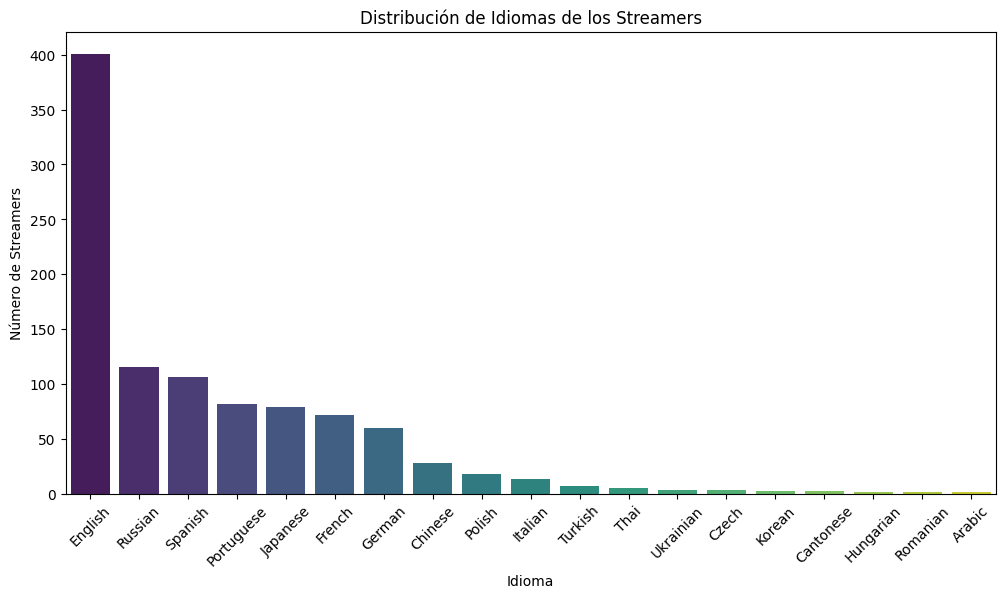

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values, palette="viridis")
plt.title('Distribución de Idiomas de los Streamers')
plt.xlabel('Idioma')
plt.ylabel('Número de Streamers')
plt.xticks(rotation=45)
plt.show()


In [15]:
print("\nTop 10 categorías más transmitidas:")
most_streamed_games = df['MOST_STREAMED_GAME'].value_counts().head(10)
print(most_streamed_games)


Top 10 categorías más transmitidas:
MOST_STREAMED_GAME
Just Chatting         257
League of Legends      84
Grand Theft Auto V     74
VALORANT               60
Casino                 36
Fortnite               35
Dota 2                 35
Counter-Strike         31
Minecraft              24
Virtual Casino         23
Name: count, dtype: int64


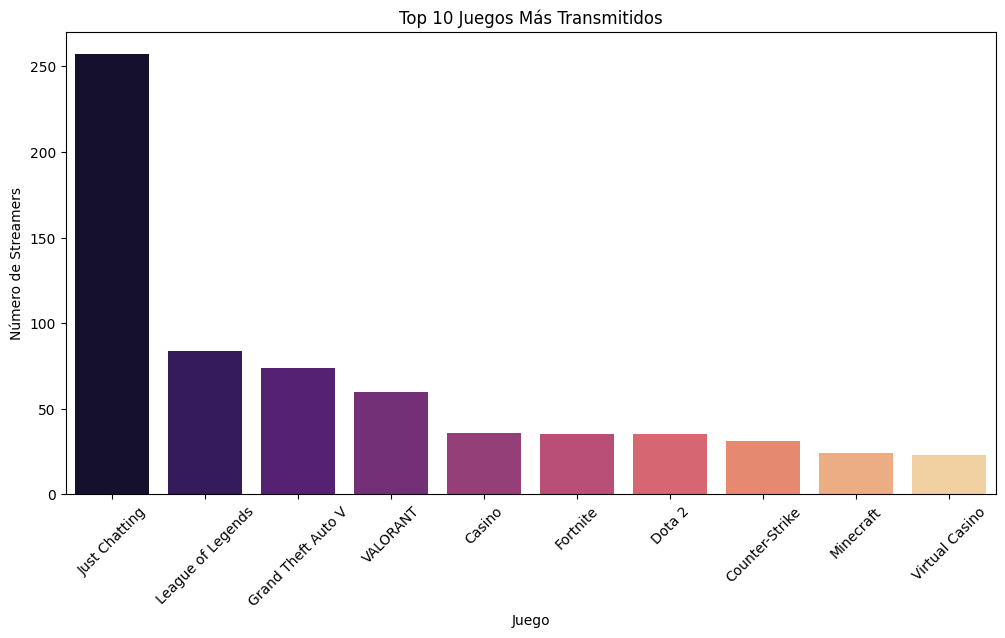

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_streamed_games.index, y=most_streamed_games.values, palette="magma")
plt.title('Top 10 Juegos Más Transmitidos')
plt.xlabel('Juego')
plt.ylabel('Número de Streamers')
plt.xticks(rotation=45)
plt.show()


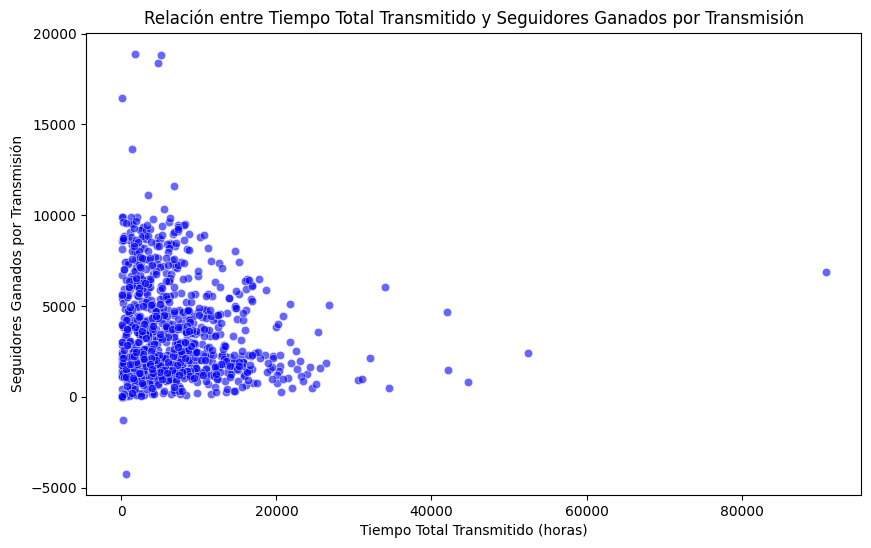

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOTAL_TIME_STREAMED', y='FOLLOWERS_GAINED_PER_STREAM', data=df, alpha=0.6, color='blue')
plt.title('Relación entre Tiempo Total Transmitido y Seguidores Ganados por Transmisión')
plt.xlabel('Tiempo Total Transmitido (horas)')
plt.ylabel('Seguidores Ganados por Transmisión')
plt.show()

In [19]:
print("\nMatriz de correlación:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Matriz de correlación:
                                 RANK  AVERAGE_STREAM_DURATION  \
RANK                         1.000000                 0.008177   
AVERAGE_STREAM_DURATION      0.008177                 1.000000   
FOLLOWERS_GAINED_PER_STREAM -0.185244                -0.157805   
AVG_VIEWERS_PER_STREAM      -0.263267                 0.089485   
AVG_GAMES_PER_STREAM        -0.139887                 0.122828   
TOTAL_TIME_STREAMED         -0.067834                 0.360657   
TOTAL_FOLLOWERS             -0.330846                -0.065234   
TOTAL_VIEWS                 -0.271250                 0.131747   
TOTAL_GAMES_STREAMED        -0.111584                 0.056271   
ACTIVE_DAYS_PER_WEEK        -0.052343                 0.191241   

                             FOLLOWERS_GAINED_PER_STREAM  \
RANK                                           -0.185244   
AVERAGE_STREAM_DURATION                        -0.157805   
FOLLOWERS_GAINED_PER_STREAM                     1.000000   
AVG_VIEWE

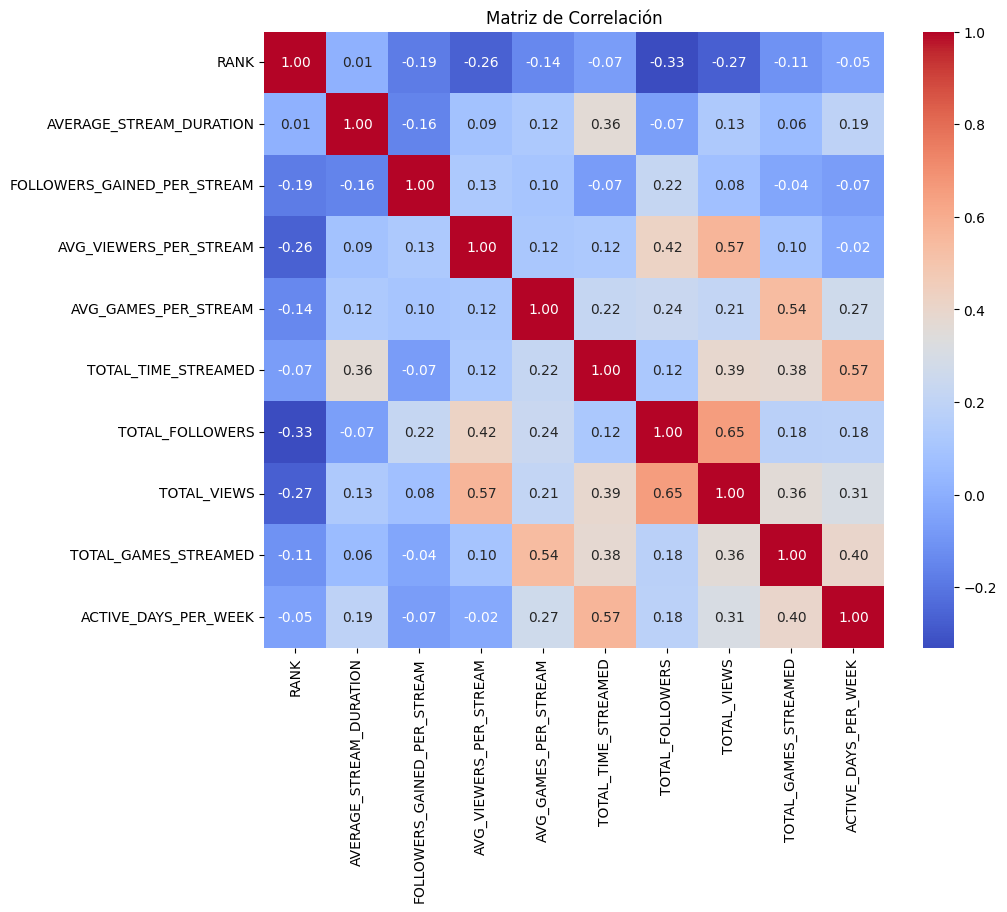

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


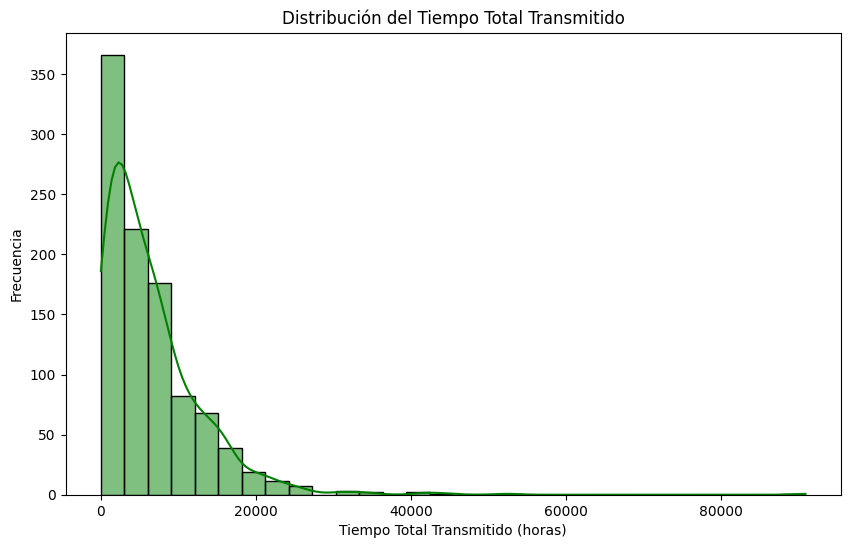

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_TIME_STREAMED'], bins=30, kde=True, color='green')
plt.title('Distribución del Tiempo Total Transmitido')
plt.xlabel('Tiempo Total Transmitido (horas)')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


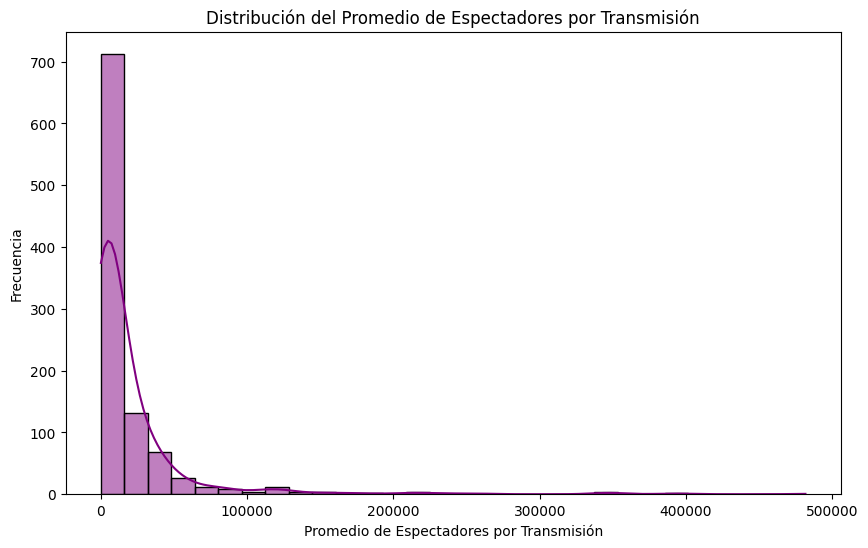

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AVG_VIEWERS_PER_STREAM'], bins=30, kde=True, color='purple')
plt.title('Distribución del Promedio de Espectadores por Transmisión')
plt.xlabel('Promedio de Espectadores por Transmisión')
plt.ylabel('Frecuencia')
plt.show()

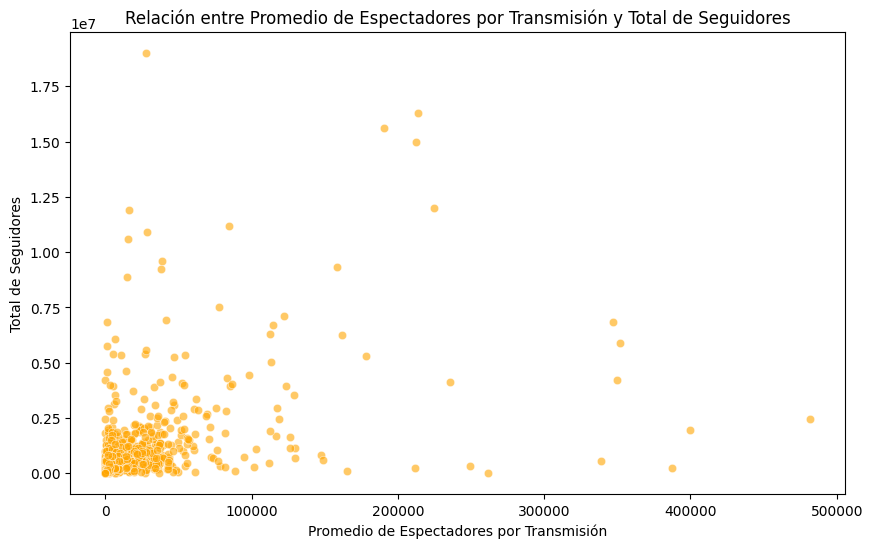

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_VIEWERS_PER_STREAM', y='TOTAL_FOLLOWERS', data=df, alpha=0.6, color='orange')
plt.title('Relación entre Promedio de Espectadores por Transmisión y Total de Seguidores')
plt.xlabel('Promedio de Espectadores por Transmisión')
plt.ylabel('Total de Seguidores')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


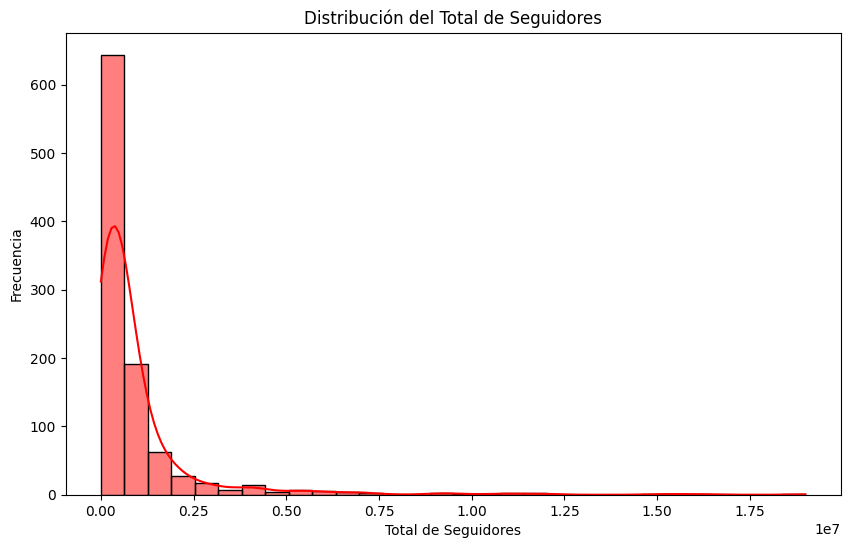

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_FOLLOWERS'], bins=30, kde=True, color='red')
plt.title('Distribución del Total de Seguidores')
plt.xlabel('Total de Seguidores')
plt.ylabel('Frecuencia')
plt.show()


In [5]:
print("\nDías más activos:")
most_active_days = df['MOST_ACTIVE_DAY'].value_counts()
print(most_active_days)


Días más activos:
MOST_ACTIVE_DAY
Tuesday      183
Wednesday    176
Thursday     144
Saturday     132
Sunday       129
Monday       118
Friday       117
Name: count, dtype: int64


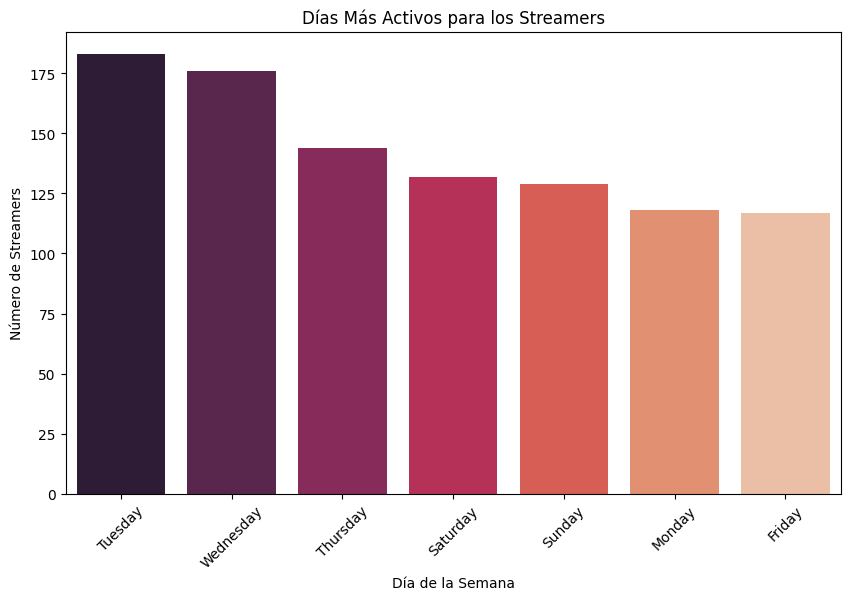

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_days.index, y=most_active_days.values, palette="rocket")
plt.title('Días Más Activos para los Streamers')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Streamers')
plt.xticks(rotation=45)
plt.show()